## Лабораторная работа №1

#### Поправил run.sh файл:

In [ ]:
#for n in `seq $1 $2 $3`
#do
#    echo "n=" $n
#    ./cache $n
#done

#### Создал launch.sh файл, который запускает run.sh скрипт два раза: <br /> a) для матриц размером [1000; 1100] с шагом 1<br /> b) для матриц размером [1000; 2000] с шагом 10

In [ ]:
#./run.sh 1000 1 1100 2>1100.txt
#./run.sh 1000 10 2000 2>2000.txt

#### В результате я получил два файла с результатами (временем выполнения) перемножения матриц: 1100.txt и 2000.txt соответственно. Распарсил результаты и с помощью модуля matplotlib вывел их в виде графиков. 

In [12]:
def read_log_file (path):
    results = dict()
    for line in open(path):
        if 'n = ' in line:
            n = int(line.split("=")[1])
        elif 'time' in line:
            method = line.split(":")[0][4:]
            value = float(line.split(":")[1])
            results[method] = results.get(method, list())
            pair = (n, value)
            results[method].append(pair)
    return results

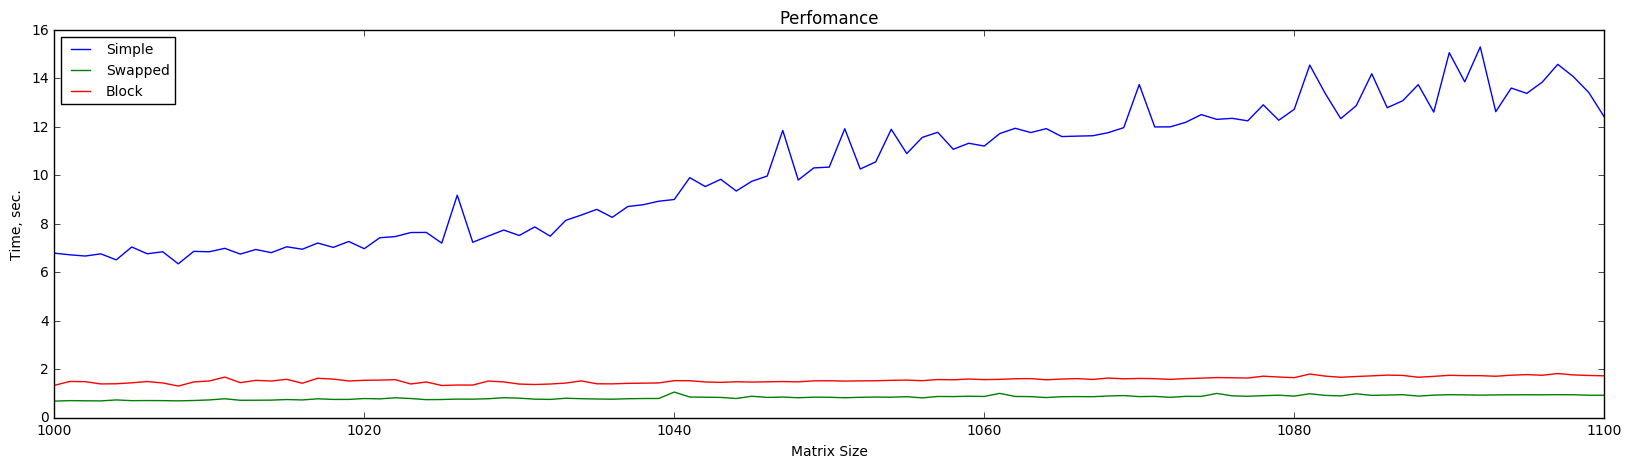

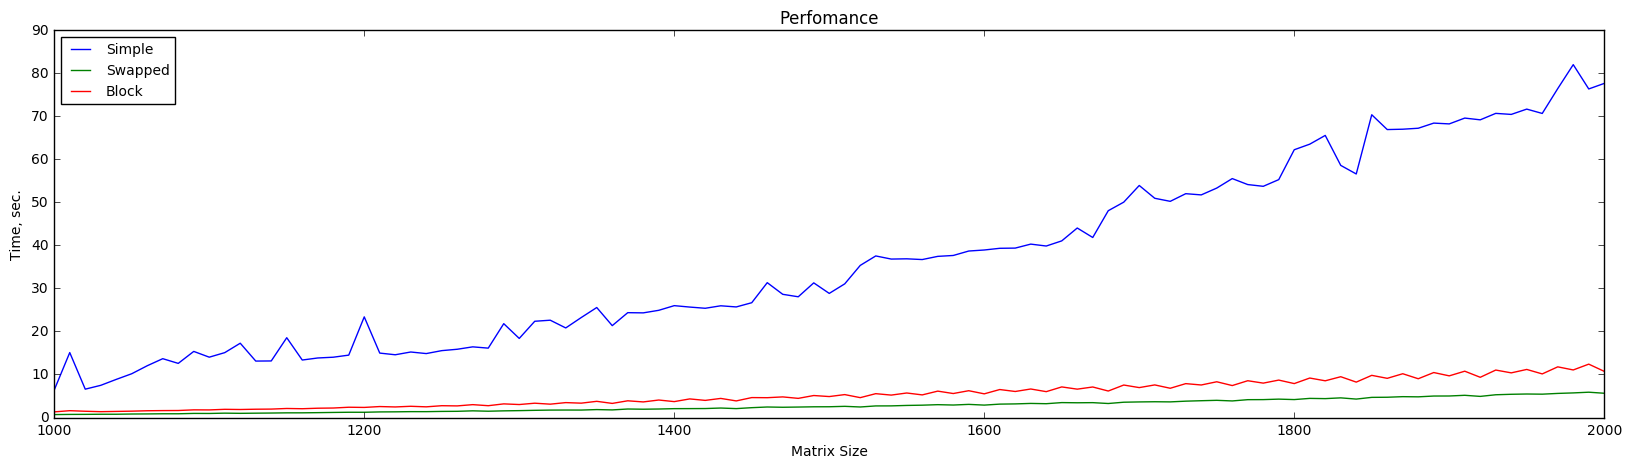

In [23]:
import matplotlib.pyplot as plt

def plot_results(results):
    methods = results.keys()

    for method in methods:
        plt.plot([row[0] for row in results[method]], [row[1] for row in results[method]], label=method)
        plt.legend(loc=2, fontsize=10)
        plt.xlabel('Matrix Size')
        plt.ylabel('Time, sec.')
        plt.title('Perfomance')
    plt.show()

results1100 = read_log_file("1100.txt")
results2000 = read_log_file("2000.txt")

plot_results(results1100)
plot_results(results2000)

